<a href="https://colab.research.google.com/github/Voztok94/Breast-Cancer-Binary-Classification/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cancer = load_breast_cancer()  #  Load the dataset

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [52]:
#  Check the sample and target sizes
cancer.target[::100]

array([0, 0, 1, 0, 0, 1])

In [53]:
cancer.data.shape

(569, 30)

In [54]:
cancer.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

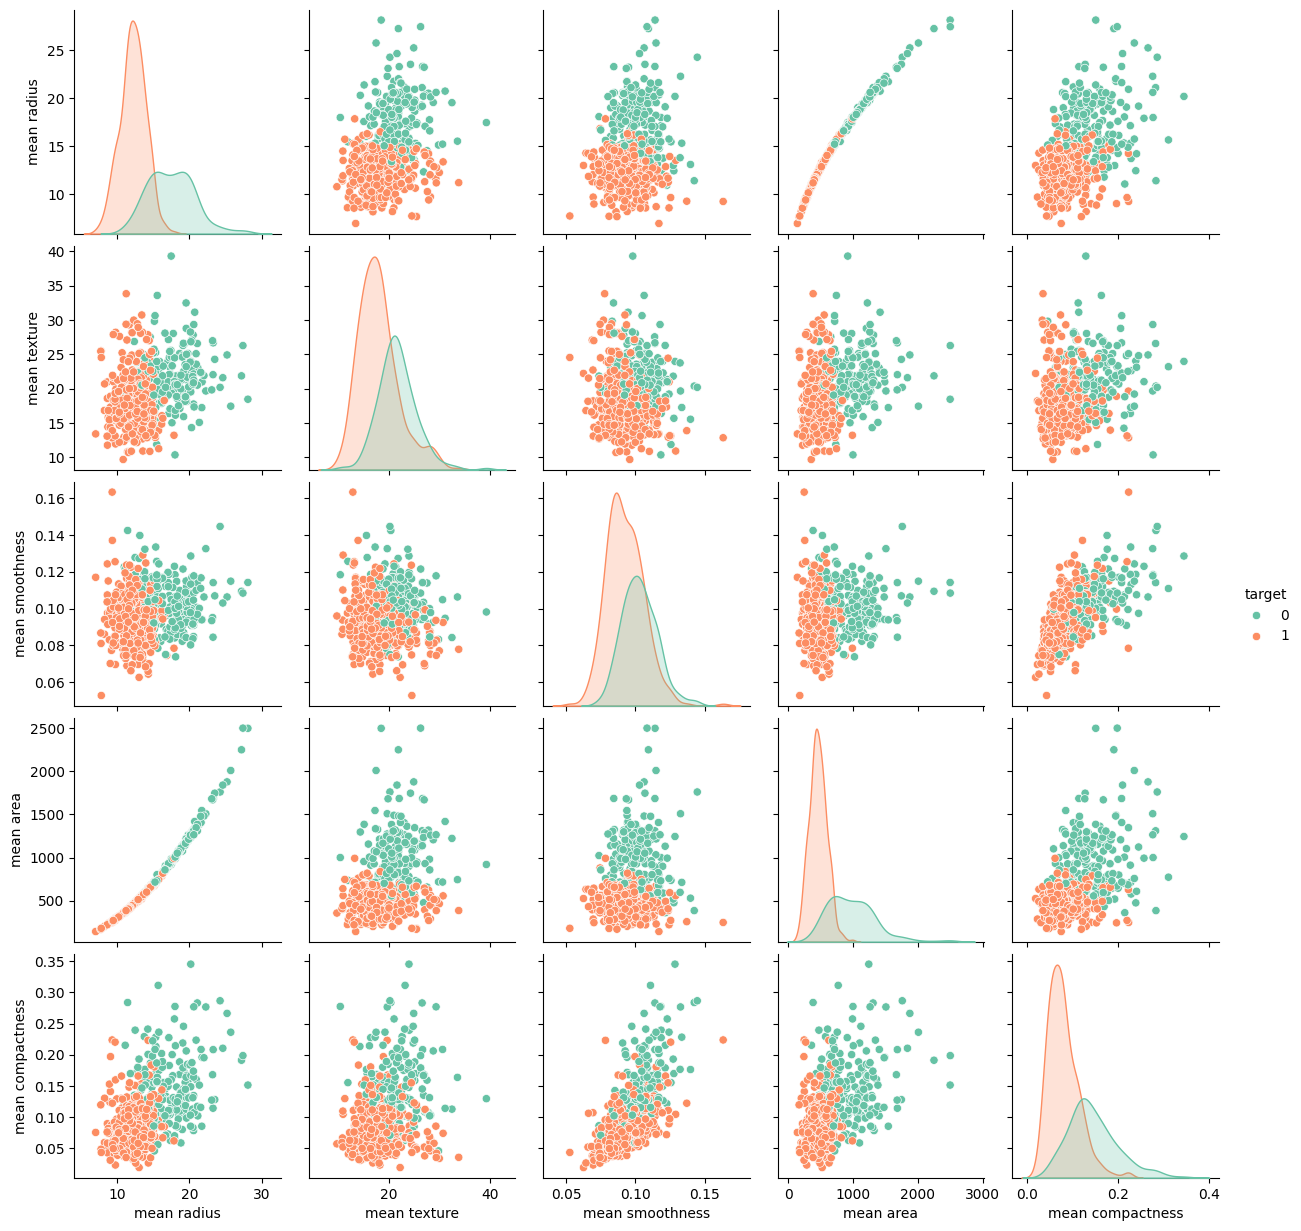

In [55]:
# Create a DataFrame for the cancer data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Add the target (malignant/benign) to the DataFrame for visualization
df['target'] = cancer.target

# Pairplot to visualize relationships between some features and the target
sns.pairplot(df[['mean radius', 'mean texture', 'mean smoothness', 'mean area', 'mean compactness', 'target']],
             hue='target', diag_kind='kde', palette='Set2')
plt.show()

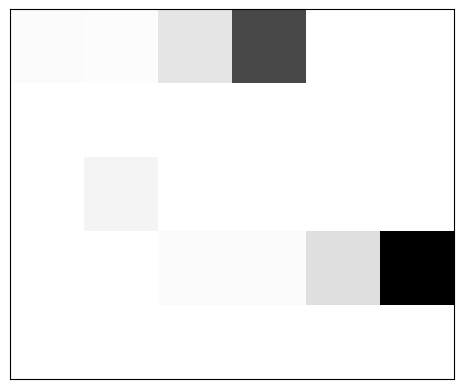

In [56]:
axes = plt.subplot()

data = plt.imshow(cancer.data[22].reshape((5, 6)), cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

yticks = axes.set_yticks([])

In [57]:
#  Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [58]:
#  Training and testing set sizes
X_train.shape

(426, 30)

In [59]:
X_test.shape

(143, 30)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [61]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [62]:
predicted = knn.predict(X=X_test)

expected = y_test

predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [63]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [64]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [65]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [66]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

array([[43,  7],
       [ 1, 92]])

In [67]:
# Creating GaussianNB model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)  #  Train the model
predicted_nb = nb.predict(X_test)  #  Predicting
print(f'GaussianNB Score: {nb.score(X_test, y_test):.2%}')  #  Estimator method score

GaussianNB Score: 95.10%


In [68]:
# Confusion Matrix for GaussianNB
confusion_nb = confusion_matrix(y_true=y_test, y_pred=predicted_nb)
print(confusion_nb)
print(classification_report(y_test, predicted_nb, target_names=cancer.target_names))  #  Classification report

[[44  6]
 [ 1 92]]
              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



<Axes: >

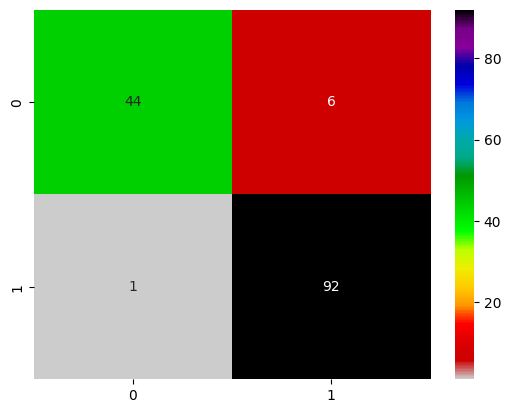

In [69]:
#  Visualizing GaussianNB confusion Matrix
confusion_df_nb = pd.DataFrame(confusion_nb, index=range(len(confusion_nb)), columns=range(len(confusion_nb)))
sns.heatmap(confusion_df_nb, annot=True, cmap='nipy_spectral_r')

In [70]:
from sklearn.metrics import classification_report

names = [str(cancer) for cancer in cancer.target_names]

print(classification_report(expected, predicted, target_names=names))  #  Classification report

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



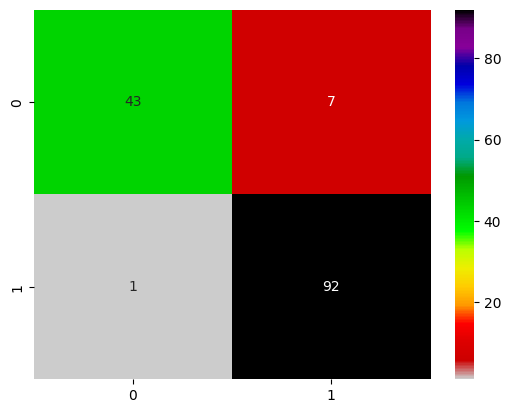

In [71]:
# use the length of the confusion matrix to define the size of the dataframe
confustion_df = pd.DataFrame(confusion, index=range(len(confusion)), columns=range(len(confusion)))

axes = sns.heatmap(confustion_df, annot=True,
            cmap='nipy_spectral_r')

In [76]:
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

estimators = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000)
    }

In [73]:
from sklearn.model_selection import KFold, cross_val_score  #  Cross validation

kfold = KFold(n_splits=10, shuffle=True, random_state=11)

scores_nb = cross_val_score(estimator=nb, X=cancer.data, y=cancer.target, cv=kfold)
print(f'GaussianNB Mean accuracy: {scores_nb.mean():.2%}')
print(f'GaussianNB Accuracy standard deviation: {scores_nb.std():.2%}')

GaussianNB Mean accuracy: 93.85%
GaussianNB Accuracy standard deviation: 2.75%


In [74]:
from sklearn.preprocessing import StandardScaler

for estimator_name, estimator_object in estimators.items():
  kfold=KFold(n_splits=10, shuffle=True, random_state=11)
  if estimator_name == 'LogisticRegression':
    scaler = StandardScaler()
    X = scaler.fit_transform(cancer.data)
    scores = cross_val_score(estimator=estimator_object, X=X, y=cancer.target, cv=kfold)
  else:
    scores = cross_val_score(estimator=estimator_object, X=cancer.data, y=cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=97.72%; standard deviation=1.37%


In [75]:
for k in range(1, 20, 2):
  kfold = KFold(n_splits=10, shuffle=True, random_state=11)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn, X=cancer.data, y=cancer.target, cv=kfold)
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=91.39%; standard deviation=2.76%
k=3 ; mean accuracy=92.97%; standard deviation=1.56%
k=5 ; mean accuracy=92.79%; standard deviation=2.01%
k=7 ; mean accuracy=93.32%; standard deviation=2.19%
k=9 ; mean accuracy=93.50%; standard deviation=2.72%
k=11; mean accuracy=92.97%; standard deviation=3.03%
k=13; mean accuracy=93.32%; standard deviation=3.21%
k=15; mean accuracy=92.80%; standard deviation=3.71%
k=17; mean accuracy=92.62%; standard deviation=3.66%
k=19; mean accuracy=92.79%; standard deviation=3.37%
